# Importing Dependencies


In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import seaborn as  sns
import matplotlib.pyplot as plt


# Loading the datasets 

In [2]:
crd = pd.read_csv("creditcard.csv")

In [3]:
# first 10 of the datasets
crd.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# last 10 of the dataset
crd.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#check each transaction missing values
crd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transaction & frudulent transactions
crd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Correlation heatmap using seaborn

->
Seaborn correlation heatmaps are an effective visualization technique for examining patterns and relationships in datasets and can be used to pinpoint key variables for additional investigation.


Text(0.5, 1.0, 'Correlation heatmap for the features')

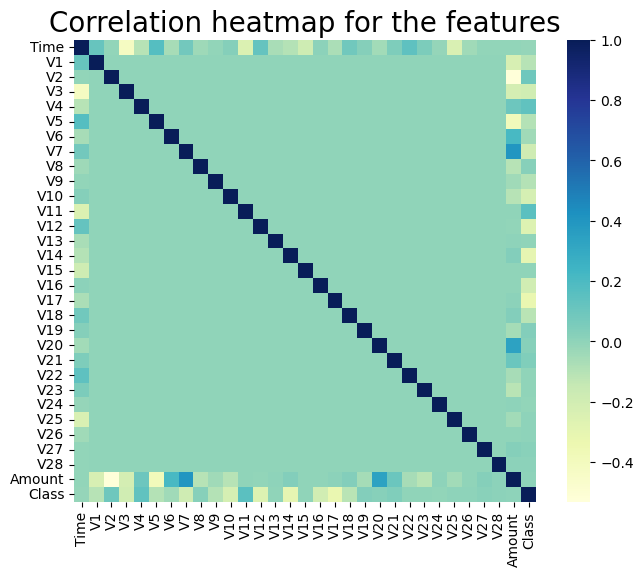

In [8]:
corr = crd.corr()

f, ax = plt.subplots(figsize=(8,6))

sns.heatmap(corr, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

# This datasets is highly unbalanced 
0->Normal Transactions 
1->fraudulent Transactions

In [9]:
# seperating the data for analysis
legit = crd[crd.Class==0]
fraud = crd[crd.Class==1]

# boxPlot using seaborn 

-> 
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$'),
  Text(0, 1000000.0, '$\\mathdefault{10^{6}}$')])

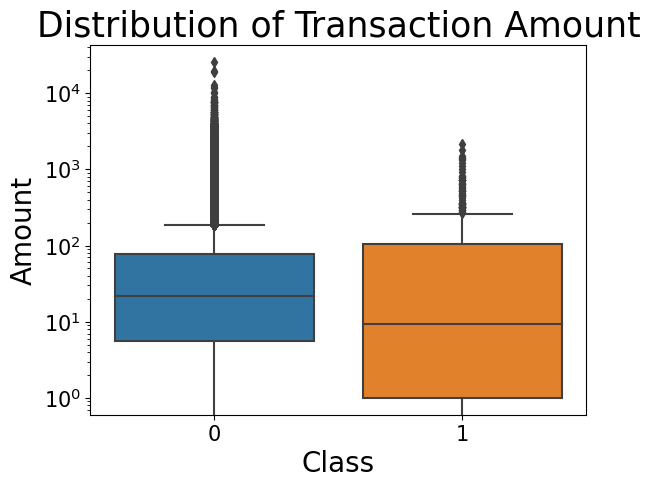

In [10]:
# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (12,10)})
g = sns.boxplot(data = crd, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# statistical measurs of the data 
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 [Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$'),
  Text(0, 1000000.0, '$\\mathdefault{10^{6}}$')])

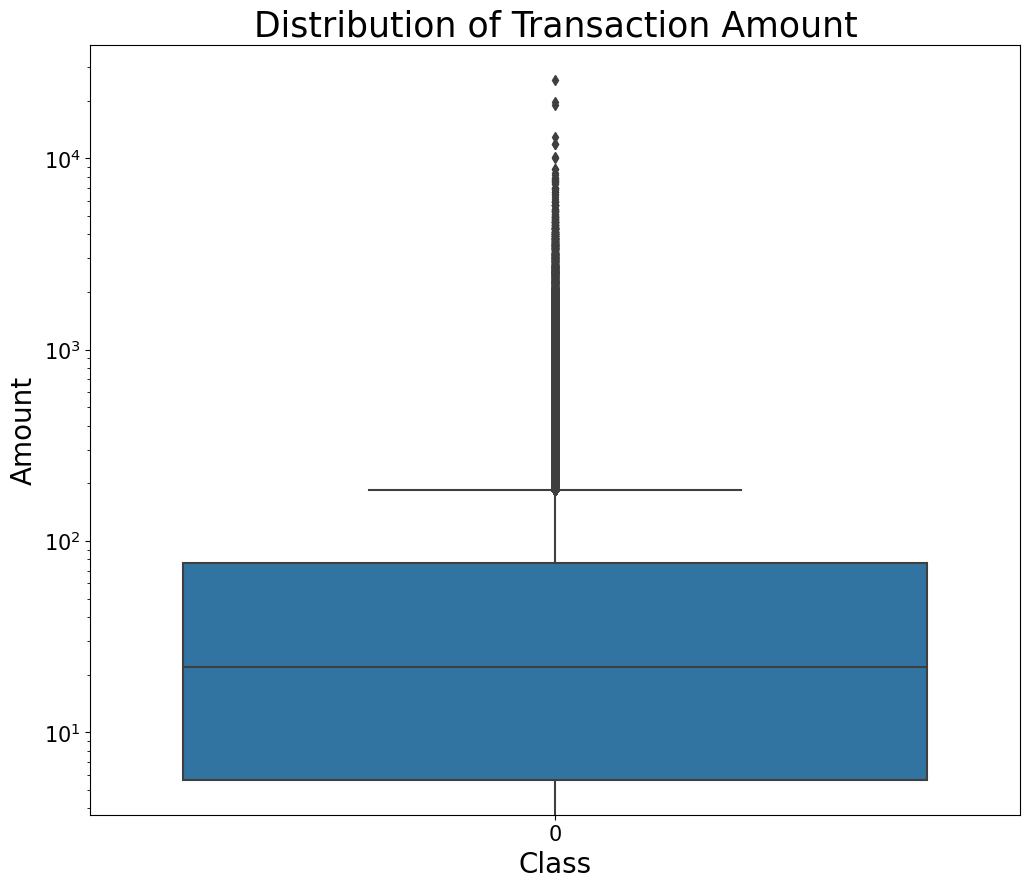

In [13]:
# Analysis of legit by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = legit, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$')])

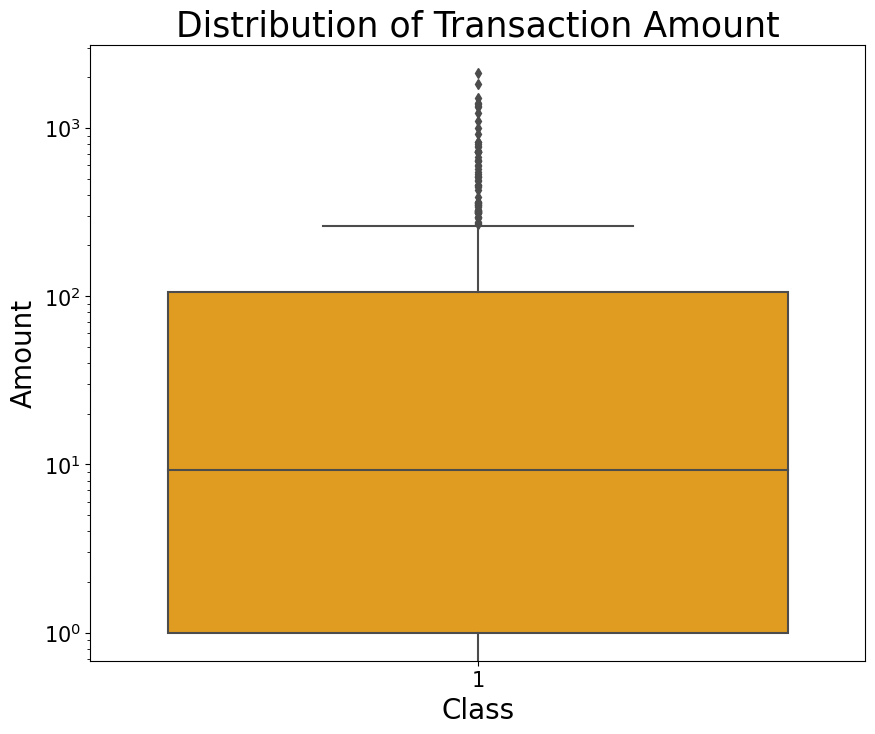

In [15]:
# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data =fraud , x = 'Class', y = 'Amount',color='orange')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

In [16]:
# compare the values for both transactions
crd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling
build a sample dataset containing simiral distribution of normal transactions and fraudulent transaction.
Number of fraudulent transactions->492


In [17]:
legit_sample = legit.sample(n=492)

# concatenating two DataFrames

In [18]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [19]:
new_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104460,69075.0,0.259529,-0.038050,-1.346613,-2.464864,1.790855,3.579407,-1.632590,-1.893651,-1.310329,...,-1.107426,0.676772,-0.106321,1.034214,0.818365,-0.238037,0.110732,0.269563,10.00,0
141474,84342.0,-0.593948,0.483884,1.500838,-0.731268,1.051701,-0.379719,0.729905,-0.133839,-0.537683,...,-0.179576,-0.538578,-0.123403,-0.511280,-0.300370,-0.092866,-0.111982,-0.105761,0.89,0
192921,129909.0,2.108724,-0.823936,-0.498417,-0.478156,-0.855145,-0.261754,-0.848374,-0.067636,-0.132552,...,-0.622719,-1.257614,0.525883,0.624634,-0.705864,0.201713,-0.016693,-0.029114,21.99,0
172255,121027.0,2.120073,-0.719323,-1.192915,-0.736961,-0.672132,-0.579483,-0.989792,-0.002989,-0.164004,...,0.265845,0.824301,0.042782,-0.505364,-0.129694,-0.083254,0.024287,-0.025241,19.95,0
71832,54460.0,1.179310,-0.086113,0.722187,0.057193,-0.619342,-0.427427,-0.283641,-0.030247,0.267959,...,-0.145440,-0.408605,0.157938,0.140004,-0.045781,0.813265,-0.045043,0.016696,25.99,0


In [20]:
new_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
# spliting the data into features and targets
x= new_dataset.drop(columns='Class',axis=1)
y= new_dataset['Class']

In [23]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104460,69075.0,0.259529,-0.038050,-1.346613,-2.464864,1.790855,3.579407,-1.632590,-1.893651,-1.310329,...,0.726281,-1.107426,0.676772,-0.106321,1.034214,0.818365,-0.238037,0.110732,0.269563,10.00
141474,84342.0,-0.593948,0.483884,1.500838,-0.731268,1.051701,-0.379719,0.729905,-0.133839,-0.537683,...,0.073988,-0.179576,-0.538578,-0.123403,-0.511280,-0.300370,-0.092866,-0.111982,-0.105761,0.89
192921,129909.0,2.108724,-0.823936,-0.498417,-0.478156,-0.855145,-0.261754,-0.848374,-0.067636,-0.132552,...,-0.493365,-0.622719,-1.257614,0.525883,0.624634,-0.705864,0.201713,-0.016693,-0.029114,21.99
172255,121027.0,2.120073,-0.719323,-1.192915,-0.736961,-0.672132,-0.579483,-0.989792,-0.002989,-0.164004,...,0.054329,0.265845,0.824301,0.042782,-0.505364,-0.129694,-0.083254,0.024287,-0.025241,19.95
71832,54460.0,1.179310,-0.086113,0.722187,0.057193,-0.619342,-0.427427,-0.283641,-0.030247,0.267959,...,-0.002279,-0.145440,-0.408605,0.157938,0.140004,-0.045781,0.813265,-0.045043,0.016696,25.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [24]:
y

104460    0
141474    0
192921    0
172255    0
71832     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$')])

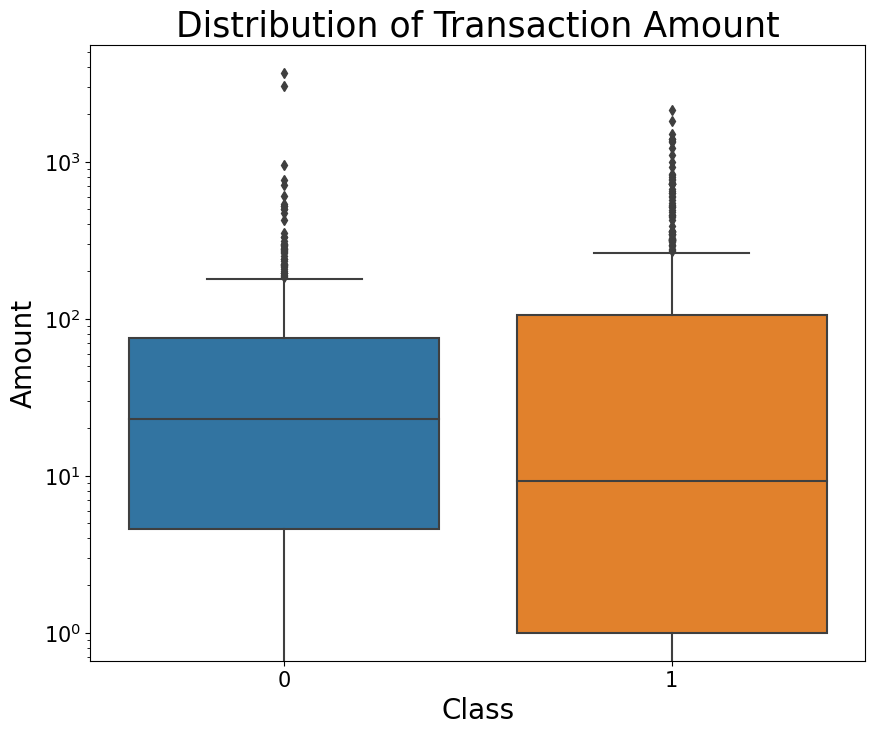

In [25]:
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = new_dataset, x = 'Class', y = 'Amount',)
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

# Split the data into training and testing Data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,stratify=y,random_state=2)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
print(y.shape,y_train.shape,y_test.shape)

(984,) (787,) (197,)


# Model Training ( Logistic Regression)


* Logistic Regression

->Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no.

In [29]:
model = LogisticRegression()

In [30]:
# training the data with Logistic Regression
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation
* accuracy Score

->Accuracy score in machine learning is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.

In [31]:
# accuracy predict on x_training dta
pred = model.predict(x_train)
accuracy = accuracy_score(pred,y_train)*100

In [32]:
print('Accuracy on training data:',accuracy)

Accuracy on training data: 95.04447268106735


In [33]:
# accuracy predict on x_test data
pred = model.predict(x_test)
accuracy = accuracy_score(pred,y_test)*100


In [34]:
print('Accuracy on test data:',accuracy)

Accuracy on test data: 91.37055837563452


# confusion matrix
It is a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:

con_m=confusion_matrix(pred,y_test)

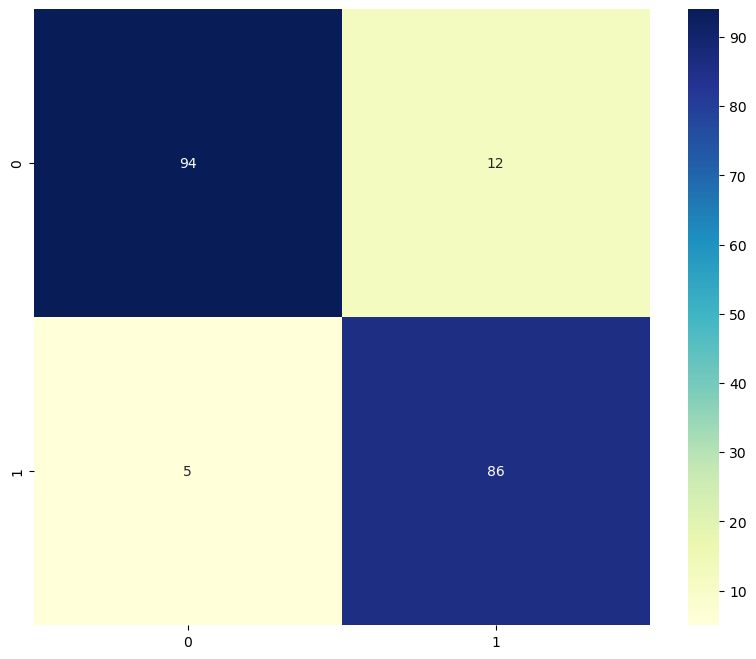

In [37]:
label =[0,1]
sns.heatmap(con_m, square = True, cmap = 'YlGnBu',annot= True)
plt.show()

# Random Forest Classification

-> Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()

In [40]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred = model.predict(x_test)

In [42]:
accuracy = accuracy_score(pred,y_test)*100
print('Accuracy on test data:',accuracy)

Accuracy on test data: 92.89340101522842


In [43]:

con_m =confusion_matrix(pred,y_test)
print(con_m)

[[97 12]
 [ 2 86]]


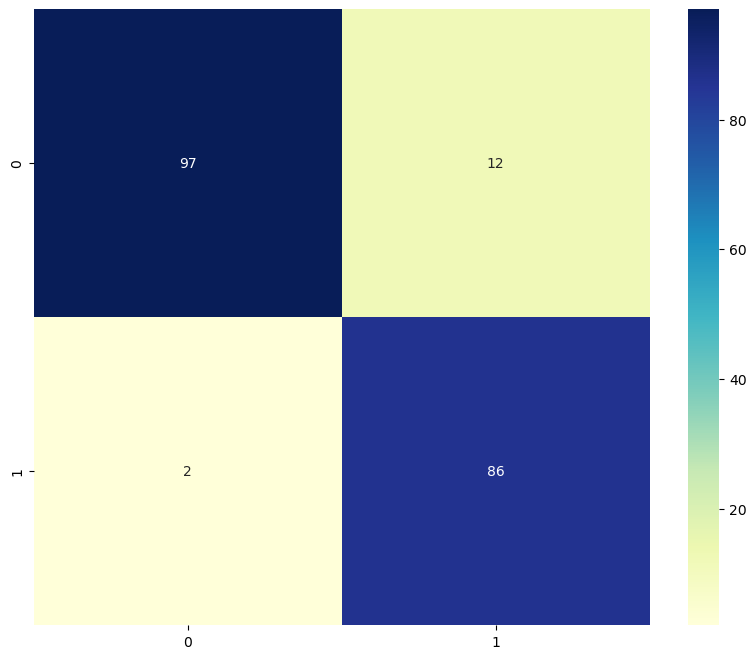

In [44]:
label =[0,1]
sns.heatmap(con_m, square = True, cmap = 'YlGnBu',annot= True)
plt.show()
